In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

%matplotlib inline 

In [3]:
data = pd.read_csv('CC GENERAL.csv')


In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data.shape

(8950, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 8950, dtype: bool

In [9]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
data.drop("CUST_ID", axis='columns',inplace=True)

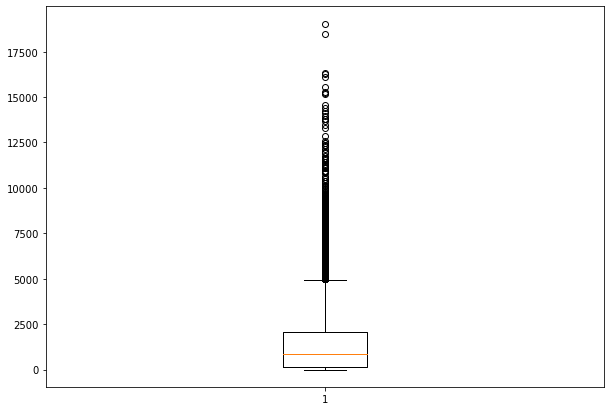

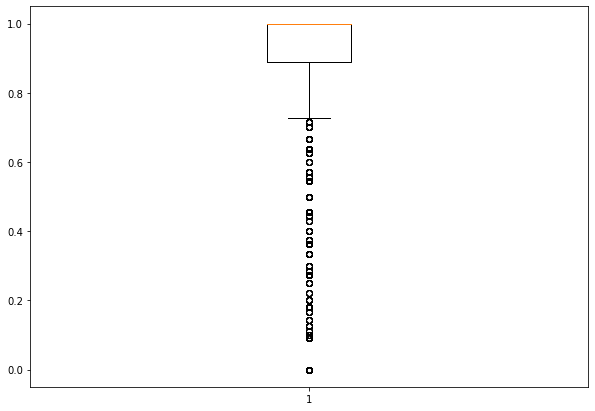

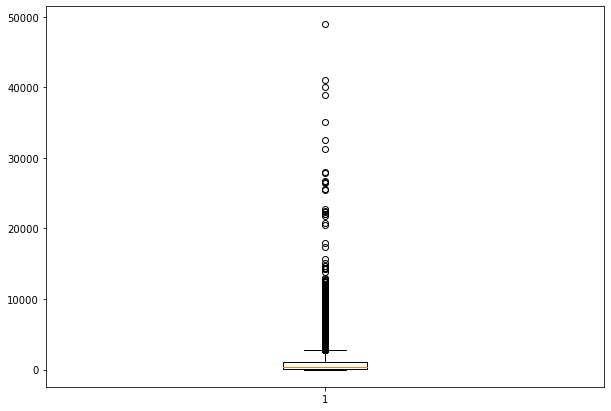

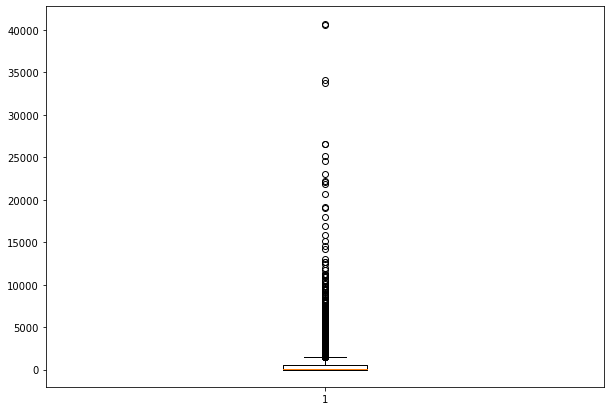

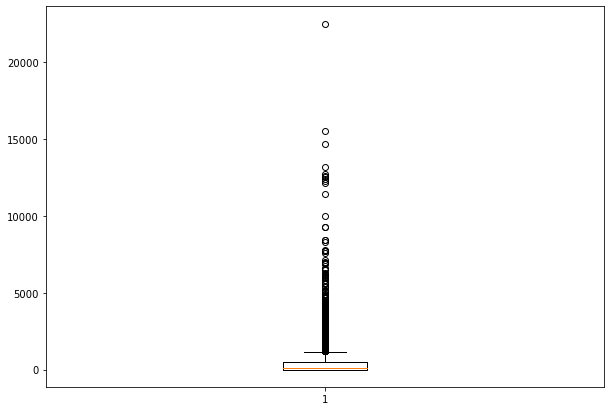

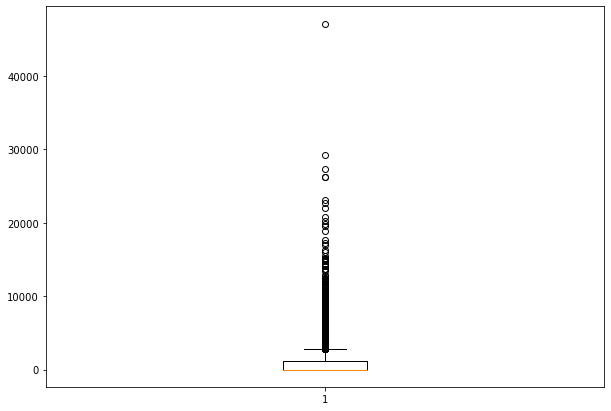

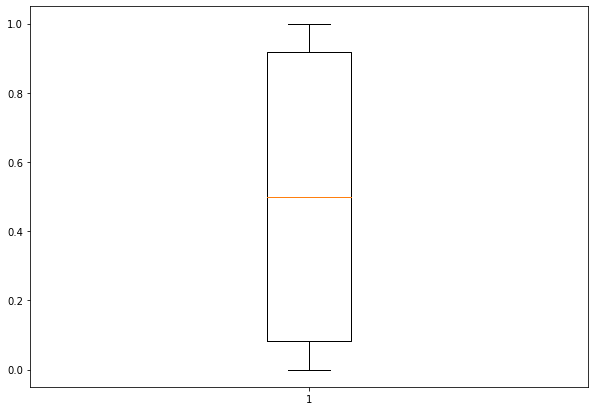

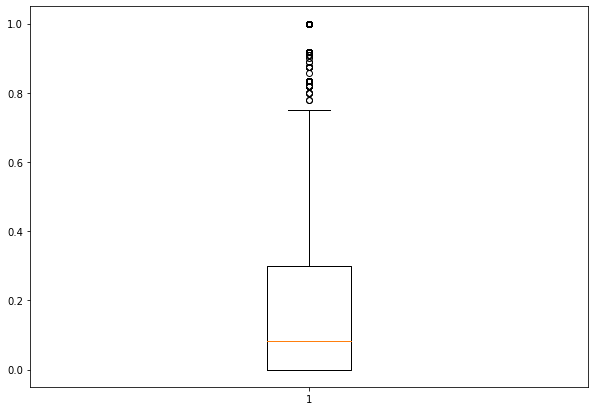

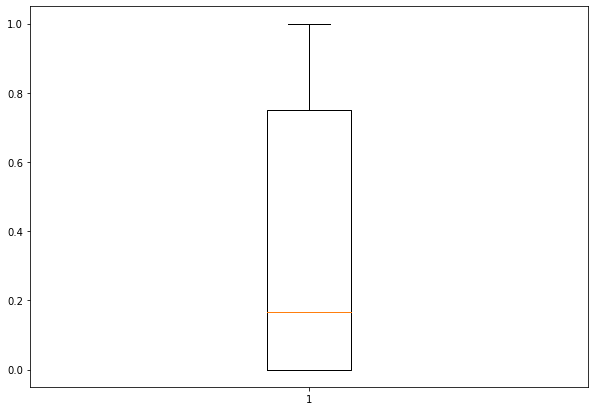

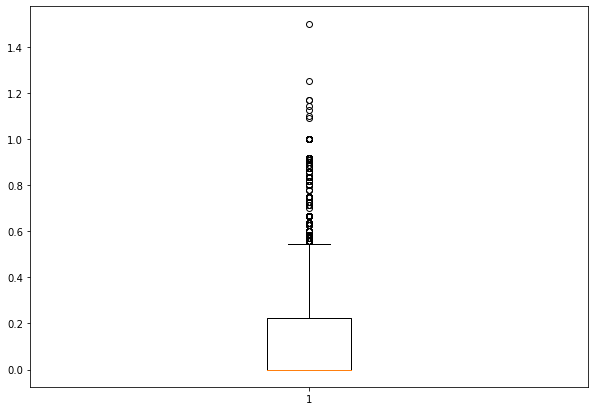

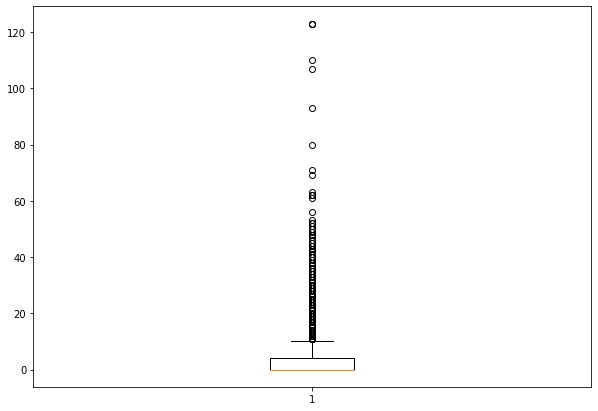

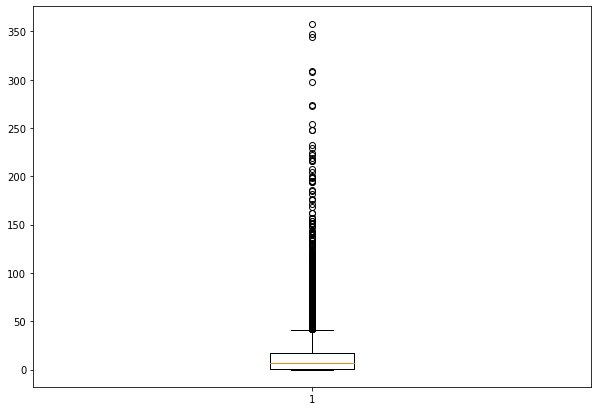

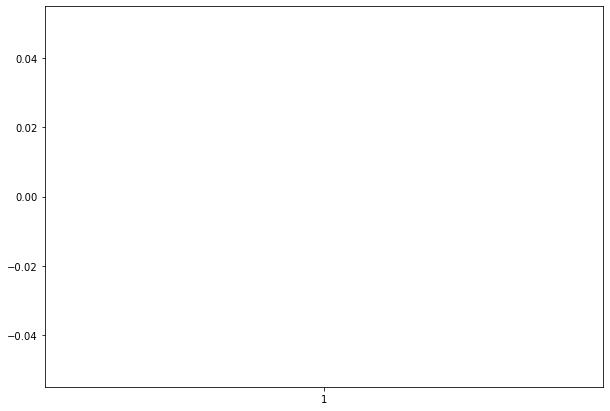

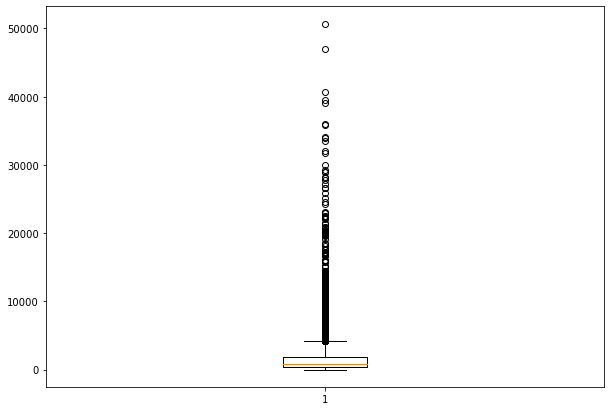

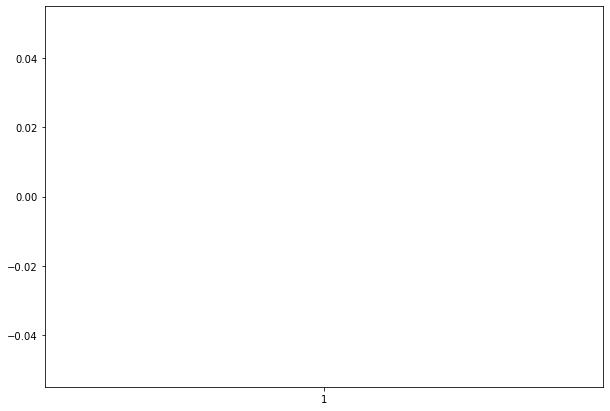

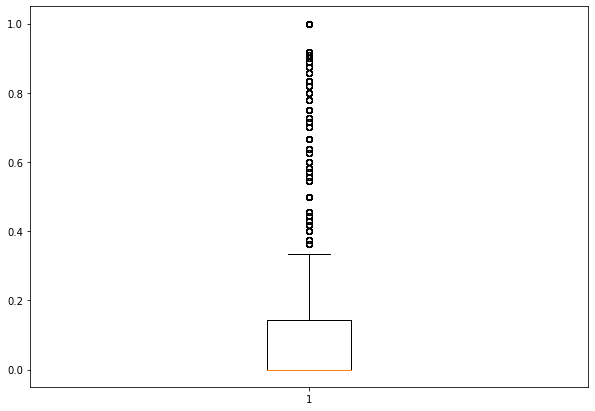

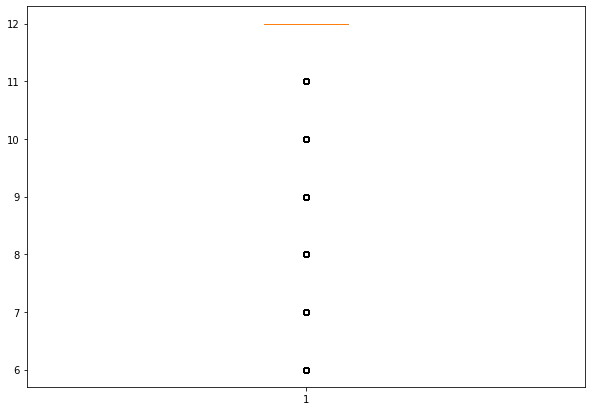

In [11]:
for i in data.columns:
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(data[i])

plt.show()

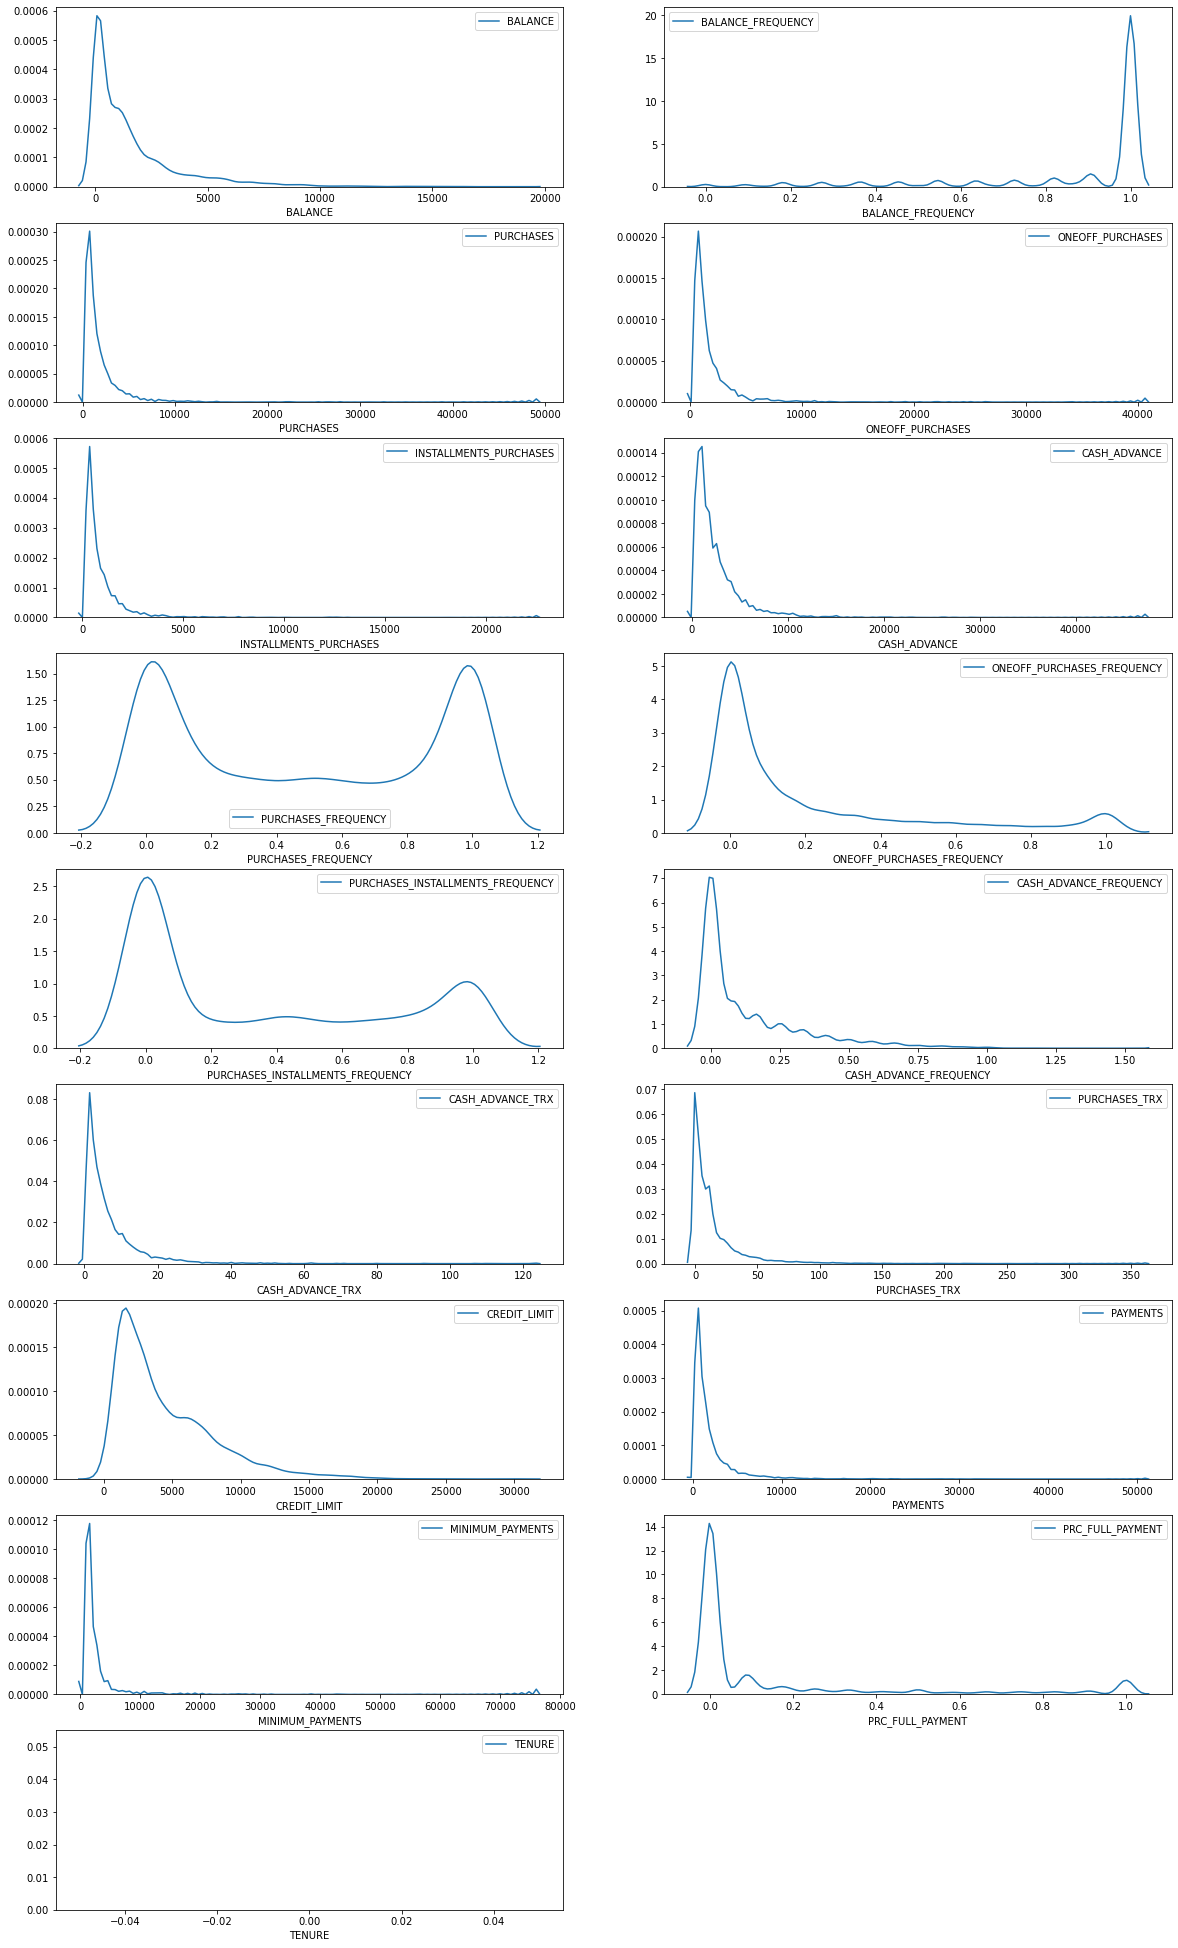

In [12]:
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
        ax = plt.subplot(9,2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [13]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(),inplace=True)

In [14]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [15]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','PURCHASES','TENURE']

In [16]:
for col in cols:
    data[col] = np.log(1 + data[col])

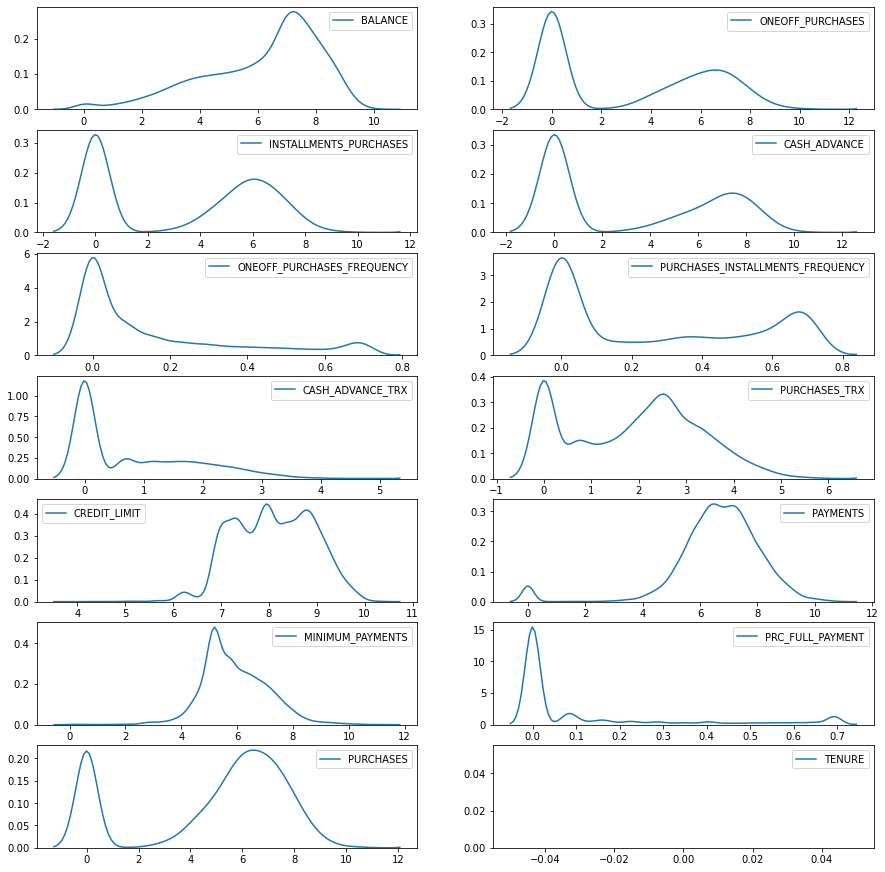

In [17]:
plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(data[col], ax=ax)
plt.show()

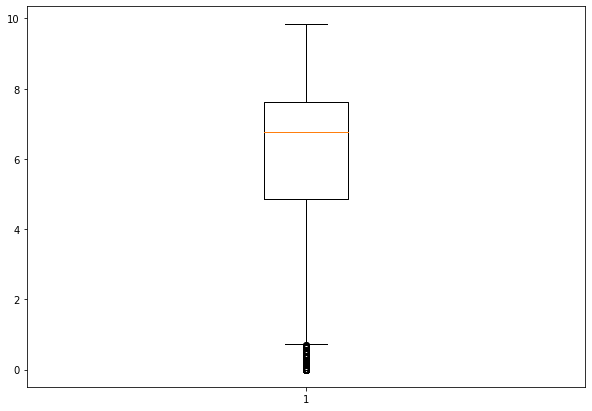

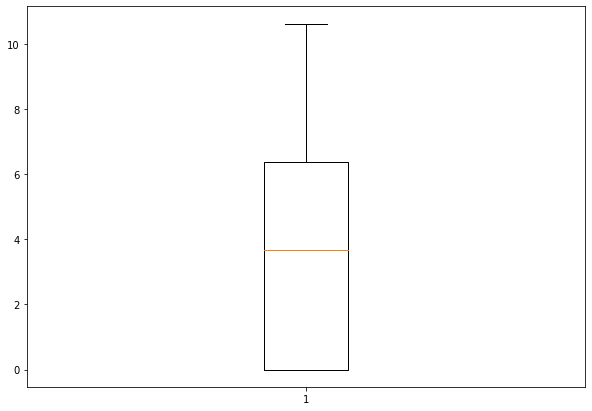

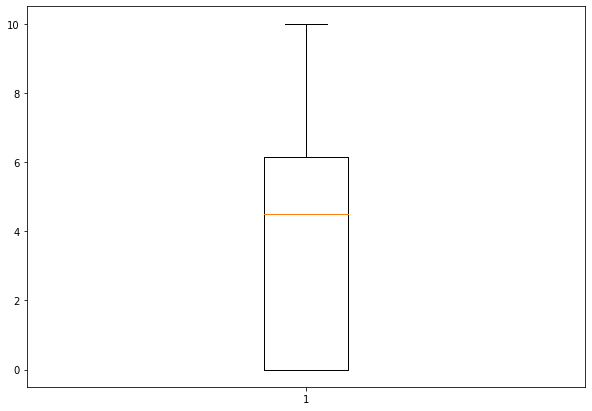

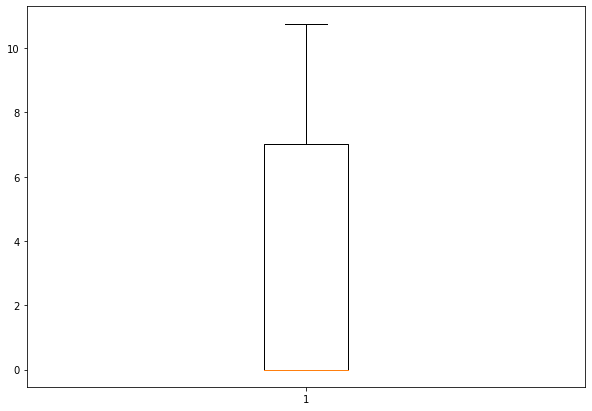

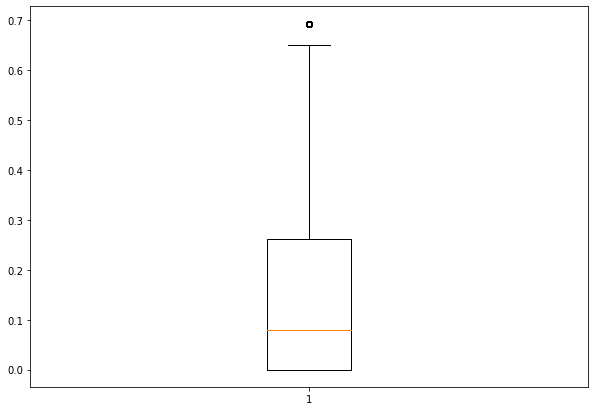

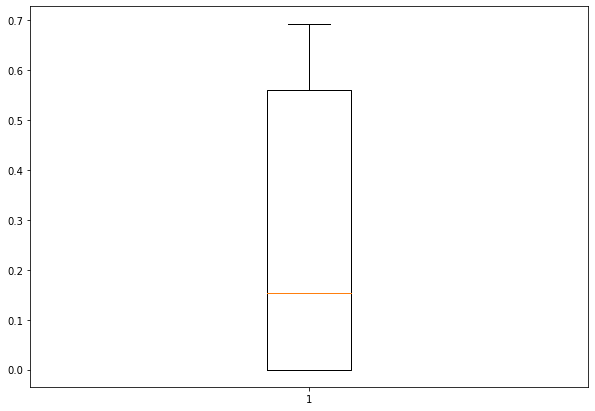

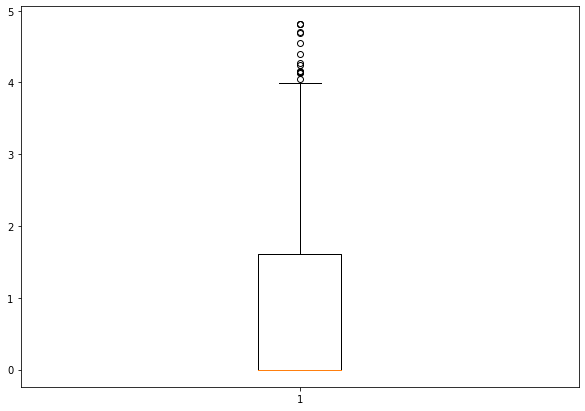

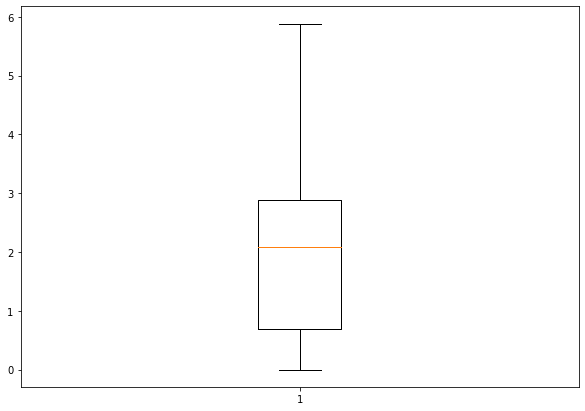

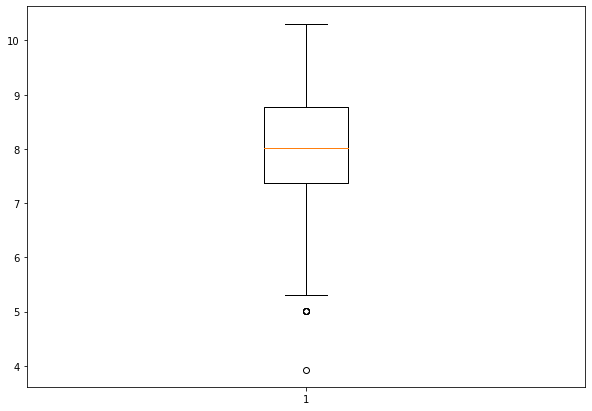

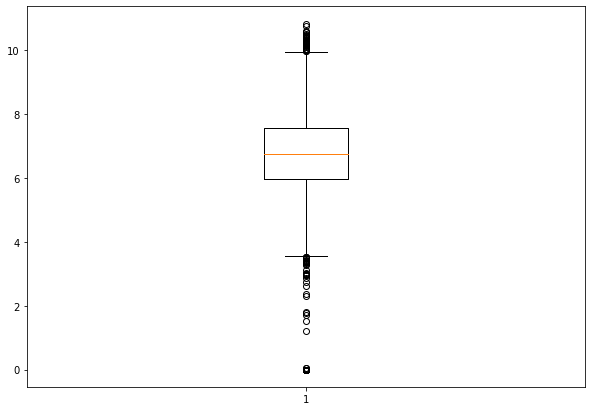

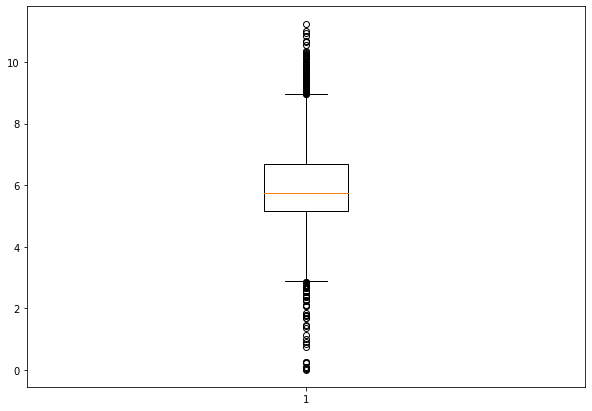

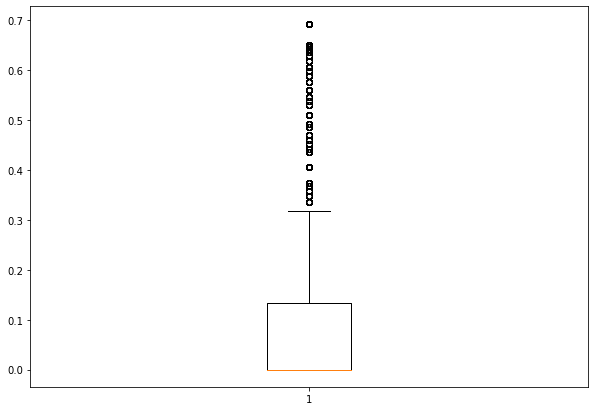

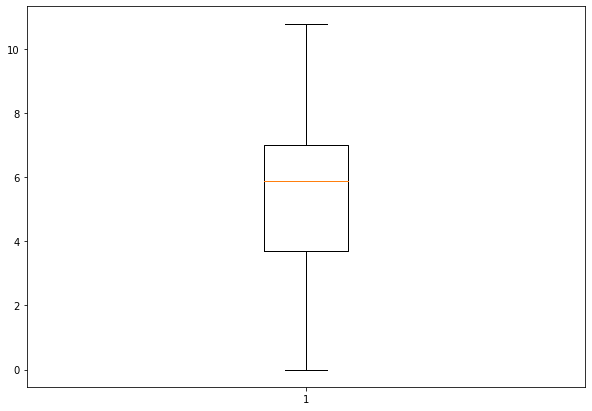

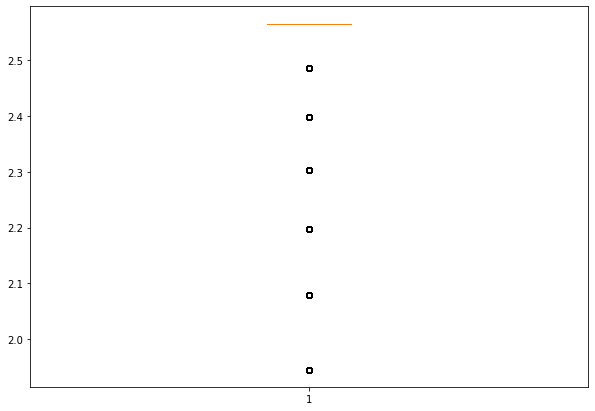

In [19]:
for i in data[cols]:
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(data[i])
    plt.show()

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_red = pca.fit_transform(data)

In [19]:
df_new=pd.DataFrame(X_red)

[345870.5386373688, 165385.52097695746, 96906.99637554646, 55271.22173911561, 43908.60202272158, 34907.87630934541, 30456.107074835883, 26603.206167924083, 23758.72654976978, 21117.152324240757]


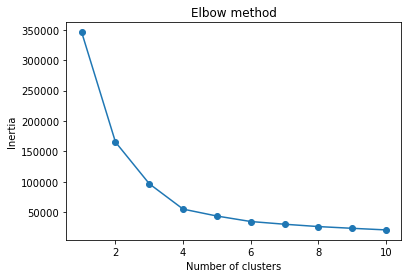

In [20]:
from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_new)
    inertias.append(kmeans.inertia_)


print(inertias)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

In [21]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.5357135832106223


In [23]:
for i in range(2,11):

    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    cluster_label=cluster.fit_predict(df_new)
    silhouette_avg = silhouette_score(df_new, cluster_label)
    print("For n_clusters =", i,
            "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.49634594425611966
For n_clusters = 3 The average silhouette_score is : 0.5099414241798138
For n_clusters = 4 The average silhouette_score is : 0.49122009415851176
For n_clusters = 5 The average silhouette_score is : 0.46699848845619923
For n_clusters = 6 The average silhouette_score is : 0.46758779012154833
For n_clusters = 7 The average silhouette_score is : 0.42120438327062826
For n_clusters = 8 The average silhouette_score is : 0.39407674610081284
For n_clusters = 9 The average silhouette_score is : 0.3913765612140379
For n_clusters = 10 The average silhouette_score is : 0.379575213401344


In [24]:
for i in range(2,11):

    gm = GaussianMixture(i) 
    cluster_label=cluster.fit_predict(df_new)
    silhouette_avg = silhouette_score(df_new, cluster_label)
    print("For n_clusters =", i,
            "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.379575213401344
For n_clusters = 3 The average silhouette_score is : 0.379575213401344
For n_clusters = 4 The average silhouette_score is : 0.379575213401344
For n_clusters = 5 The average silhouette_score is : 0.379575213401344
For n_clusters = 6 The average silhouette_score is : 0.379575213401344
For n_clusters = 7 The average silhouette_score is : 0.379575213401344
For n_clusters = 8 The average silhouette_score is : 0.379575213401344
For n_clusters = 9 The average silhouette_score is : 0.379575213401344
For n_clusters = 10 The average silhouette_score is : 0.379575213401344


In [28]:
count=0
scan = DBSCAN(eps =0.55, min_samples = 10).fit(df_new)
db_scan=df_new.copy() 
db_scan["cluster"]=scan.labels_
un=db_scan["cluster"].unique()
avg=silhouette_score(df_new, db_scan["cluster"]) 
print("For epsonlle =", 55,"and the minuium point =",10 ,"The average silhouette_score is :", avg)
print(un)
for i in db_scan["cluster"]:
    if i==-1:
        count+=1
print(count)



For epsonlle = 55 and the minuium point = 10 The average silhouette_score is : 0.4128186307894624
[ 0  1 -1]
131


No handles with labels found to put in legend.


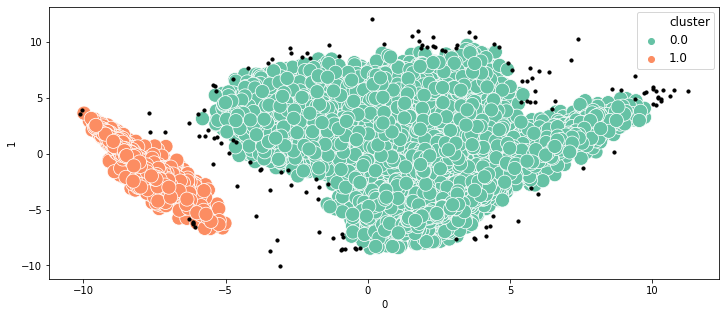

In [29]:

outliers = db_scan[db_scan['cluster']==-1]
fig,(axes) = plt.subplots(1,1,figsize=(12,5))
axes.legend()
sns.scatterplot(df_new[0], df_new[1],data=db_scan[db_scan['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
axes.scatter(outliers[0], outliers[1], s=10, label='outliers', c="k")
plt.setp(axes.get_legend().get_texts(), fontsize='12')
plt.show()


In [30]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(data[cols])
data_tran=transformer.transform(data[cols])

In [31]:

data=pd.DataFrame(data_tran)

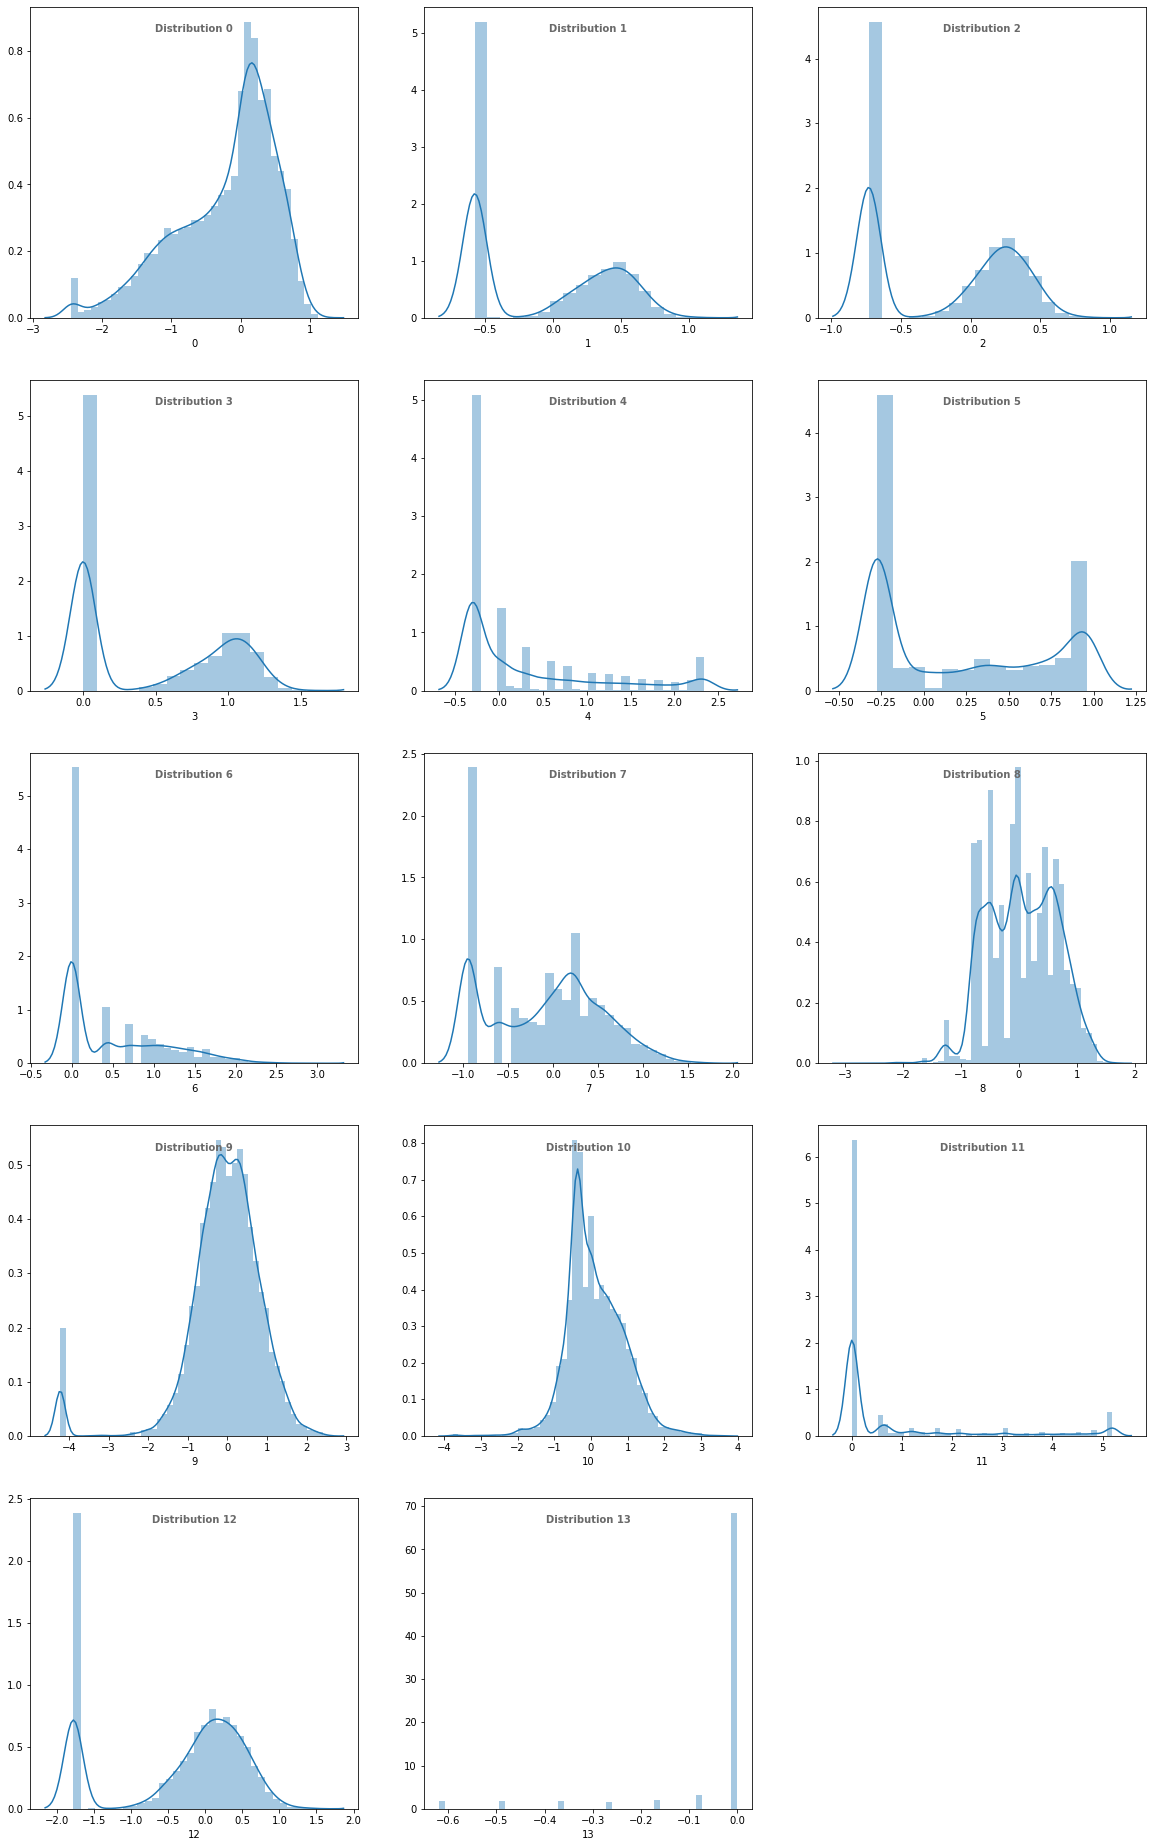

In [33]:
plt.figure(figsize = (20,40))
x = 1
for column in data:
    plt.subplot(6, 3, x)
    sns.distplot(data[column])
    plt.title('Distribution {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1

[73799.00458659123, 51360.671874896856, 40411.94358579479, 33311.25536914244, 30105.618765349376, 27575.96611882774, 25262.424810429366, 23635.950481967066, 22400.948012415174, 21196.105465223558]


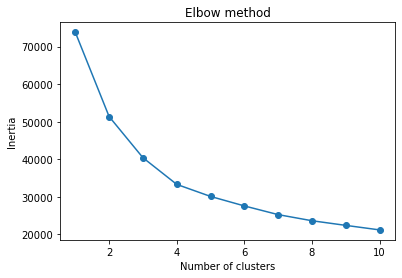

In [34]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)


print(inertias)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

In [35]:
kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(data)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.21251040588259906


In [36]:
for i in range(2,11):

    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    cluster_label=cluster.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_label)
    print("For n_clusters =", i,
            "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.34146592007103044
For n_clusters = 3 The average silhouette_score is : 0.25150912529282454
For n_clusters = 4 The average silhouette_score is : 0.2659978496280562
For n_clusters = 5 The average silhouette_score is : 0.25605548034218223
For n_clusters = 6 The average silhouette_score is : 0.22259414372856257
For n_clusters = 7 The average silhouette_score is : 0.20794261081812163
For n_clusters = 8 The average silhouette_score is : 0.21639211541645184
For n_clusters = 9 The average silhouette_score is : 0.21312183649198438
For n_clusters = 10 The average silhouette_score is : 0.2112753174919553


In [37]:
for i in range(2,11):

    gm = GaussianMixture(i) 
    cluster_label=cluster.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_label)
    print("For n_clusters =", i,
            "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.2112753174919553
For n_clusters = 3 The average silhouette_score is : 0.2112753174919553
For n_clusters = 4 The average silhouette_score is : 0.2112753174919553
For n_clusters = 5 The average silhouette_score is : 0.2112753174919553
For n_clusters = 6 The average silhouette_score is : 0.2112753174919553
For n_clusters = 7 The average silhouette_score is : 0.2112753174919553
For n_clusters = 8 The average silhouette_score is : 0.2112753174919553
For n_clusters = 9 The average silhouette_score is : 0.2112753174919553
For n_clusters = 10 The average silhouette_score is : 0.2112753174919553


In [40]:
count=0
scan = DBSCAN(eps =0.55, min_samples = 10).fit(data)
db_scan=data.copy() 
db_scan["cluster"]=scan.labels_
un=db_scan["cluster"].unique()
avg=silhouette_score(data, db_scan["cluster"]) 
print("For epsonlle =", 55,"and the minuium point =",10 ,"The average silhouette_score is :", avg)
print(un)
for i in db_scan["cluster"]:
    if i==-1:
        count+=1
print(count)

For epsonlle = 55 and the minuium point = 10 The average silhouette_score is : -0.2949663000097476
[29 -1  3  0 10  1 25  2  8  4 17  5 13 34  6  7 20 28 14 24  9 11 16 18
 31 21 12 19 23 26 15 22 30 32 33 27 36 35]
5821


No handles with labels found to put in legend.


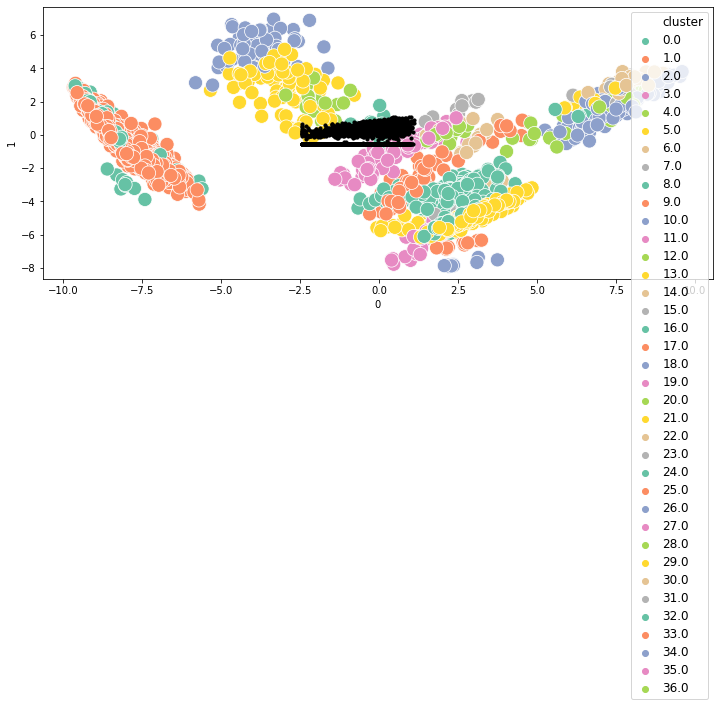

In [41]:
outliers = db_scan[db_scan['cluster']==-1]
fig,(axes) = plt.subplots(1,1,figsize=(12,5))
axes.legend()
sns.scatterplot(df_new[0], df_new[1],data=db_scan[db_scan['cluster']!=-1], hue='cluster', ax=axes, palette='Set2', legend='full', s=200)
axes.scatter(outliers[0], outliers[1], s=10, label='outliers', c="k")
plt.setp(axes.get_legend().get_texts(), fontsize='12')
plt.show()

In [ ]:
##### USING PCA RUSLT BETTER THAN ROUBEST SCALER